In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading and understanding the data

In [2]:
ad=pd.read_csv('C:/Users/Admin/Downloads/advertising.csv')

In [3]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad.shape

(200, 4)

In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

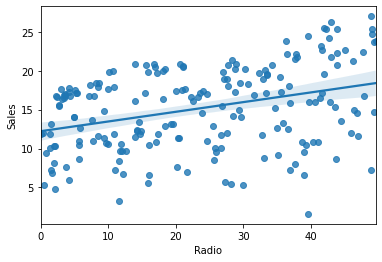

In [8]:
sns.regplot(x='Radio', y='Sales' ,data=ad)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

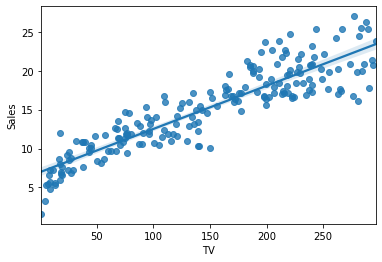

In [9]:
sns.regplot(x='TV', y='Sales' ,data=ad)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

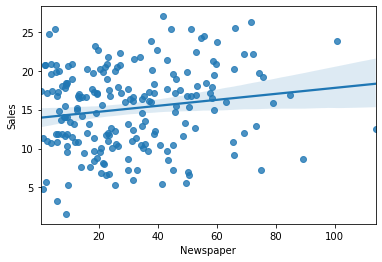

In [10]:
sns.regplot(x='Newspaper', y='Sales' ,data=ad)

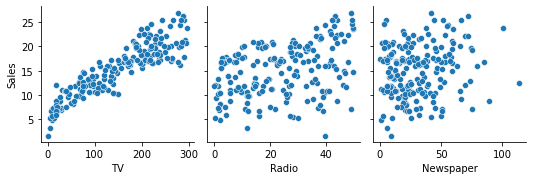

In [11]:
sns.pairplot(data=ad, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

<AxesSubplot:>

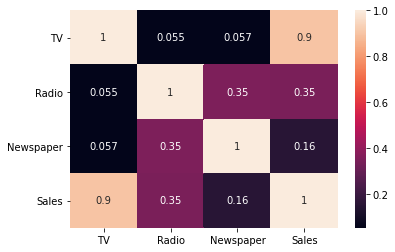

In [12]:
sns.heatmap(ad.corr(),annot=True)

# creating a single linear model (TV vs sales)

In [13]:
X=ad['TV']
y=ad['Sales']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train,X_test,y_train,y_test

(74     213.4
 3      151.5
 185    205.0
 26     142.9
 90     134.3
        ...  
 87     110.7
 103    187.9
 67     139.3
 24      62.3
 8        8.6
 Name: TV, Length: 140, dtype: float64,
 126      7.8
 104    238.2
 99     135.2
 92     217.7
 111    241.7
 167    206.8
 116    139.2
 96     197.6
 52     216.4
 69     216.8
 164    117.2
 124    229.5
 182     56.2
 154    187.8
 125     87.2
 196     94.2
 194    149.7
 177    170.2
 163    163.5
 31     112.9
 11     214.7
 73     129.4
 15     195.4
 41     177.0
 97     184.9
 128    220.3
 133    219.8
 82      75.3
 139    184.9
 123    123.1
 83      68.4
 65      69.0
 151    121.0
 162    188.4
 170     50.0
 77     120.5
 32      97.2
 173    168.4
 174    222.4
 85     193.2
 168    215.4
 112    175.7
 171    164.5
 181    218.5
 7      120.2
 46      89.7
 75      16.9
 28     248.8
 29      70.6
 195     38.2
 40     202.5
 153    171.3
 115     75.1
 64     131.1
 59     210.7
 1       44.5
 192     17.2
 136    

In [15]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [16]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.52e-52
Time:                        21:35:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

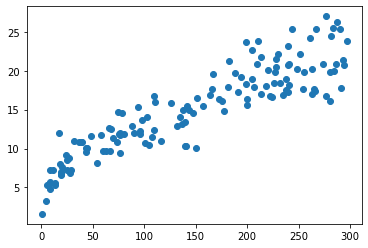

In [19]:
plt.scatter(X_train,y_train)

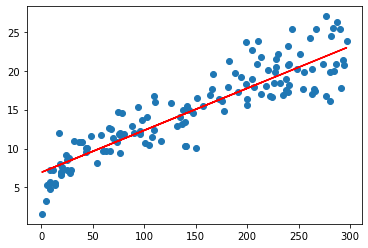

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

# Residual analysis


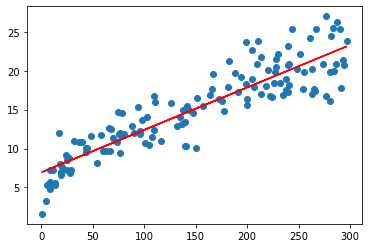

In [21]:
y_train_pred=lr_model.predict(X_train_sm)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual plot')

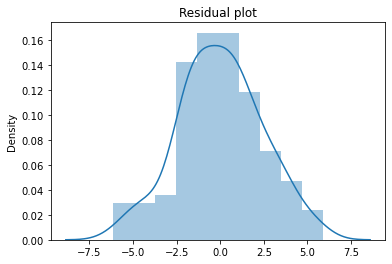

In [22]:
res=y_train-y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

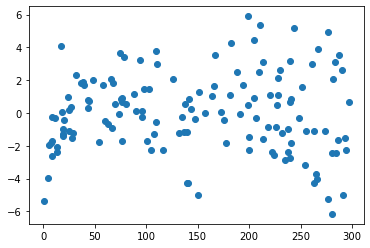

In [23]:
plt.scatter(X_train,res)
plt.show()

# prediction and evaluation on test set


In [24]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [25]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

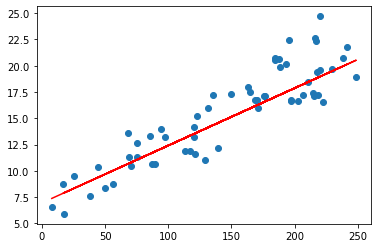

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# creating a single linear model (Radio vs sales)

In [27]:
X=ad['Radio']
y=ad['Sales']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train,X_test,y_train,y_test

(74     24.6
 3      41.3
 185    45.1
 26     29.3
 90      4.9
        ... 
 87     40.6
 103    17.2
 67     14.5
 24     12.6
 8       2.1
 Name: Radio, Length: 140, dtype: float64,
 126    38.9
 104    34.3
 99     41.7
 92     33.5
 111    38.0
 167     5.2
 116    14.3
 96      3.5
 52     41.7
 69     43.9
 164    14.7
 124    32.3
 182     5.7
 154    21.1
 125    11.8
 196     4.9
 194    35.6
 177     7.8
 163    36.8
 31     17.4
 11     24.0
 73      5.7
 15     47.7
 41     33.4
 97     21.0
 128    49.0
 133    33.5
 82     20.3
 139    43.9
 123    34.6
 83     44.5
 65      9.3
 151     8.4
 162    18.1
 170    11.6
 77     28.5
 32      1.5
 173     7.1
 174     3.4
 85     18.4
 168    23.6
 112    15.4
 171    20.9
 181     5.4
 7      19.6
 46      9.9
 75     43.7
 28     27.1
 29     16.0
 195     3.7
 40     22.3
 153    39.7
 115    35.0
 64     42.8
 59     29.5
 1      39.3
 192     4.1
 136    39.0
 152    23.3
 161    35.8
 Name: Radio, dtype: float64,
 74 

In [29]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,Radio
74,1.0,24.6
3,1.0,41.3
185,1.0,45.1
26,1.0,29.3
90,1.0,4.9


In [30]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    12.164674
Radio     0.123920
dtype: float64

In [31]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           5.36e-05
Time:                        21:35:31   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

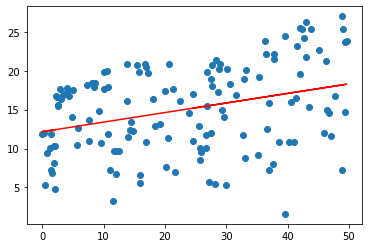

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train,12.164+0.123*X_train,'r')
plt.show()

# residual analysis

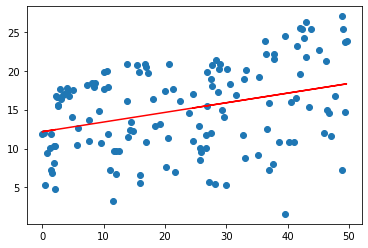

In [33]:
y_train_pred=lr_model.predict(X_train_sm)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual plot')

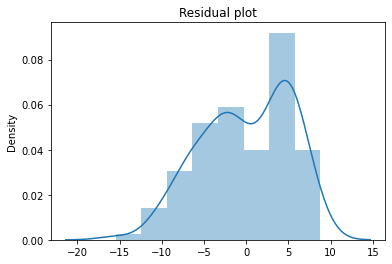

In [34]:
res=y_train-y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

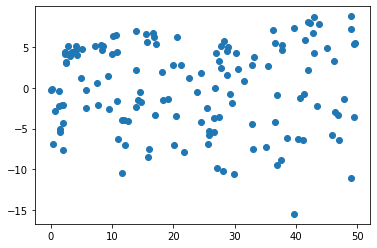

In [35]:
plt.scatter(X_train,res)
plt.show()

# prediction and evaluation on the test

In [36]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.15413341545839598

In [37]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

16.590289124066075

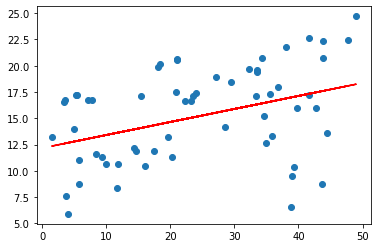

In [38]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# conclusion:-
Here we have three values Tv,Radio and Newspaper with their sales 
After creating the model TV and Radio 
Tv's model is very good beacuse it's Rsquare value is near to 1 therefore it is the best fit model.
Radio's model is very bad beacuse it's Rsquare value is near to 0 therefore it is the worst fit model.